# Astrononmy 19 Final Project

Group members: Sabi Abraham, April Ewers, Aditya Singh, Jaden Patrick Tanyao

Repository link: https://github.com/TechnoPangolin/ASTR-19-2-FINAL 
Submission document: https://docs.google.com/document/d/1SqOGh9XX9saNt5fEedSLPfw6TFOLC9DE/edit?usp=sharing&ouid=116023239842182664539&rtpof=true&sd=true

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [79]:
#open the file containing the data
fname = ("./55 Cnc RVC 274.txt")
f = open(fname, 'r')

#read the data and split it into lines
raw = f.read()
rawsplit = raw.split("\n")

#initialize an empty array of correct dimensions to hold the data
dataRVC = np.empty(shape=(3, 274), dtype='float')
#intialize counters
x = 0
y = 0

#read data into usable floats by taking apart each line and extracting the numbers
for a in rawsplit:
    #ignore the metadata and table header lines
    if a[0] != "\\" and a[0] != "|":
        #split apart the line on spaces
        b = a.split(" ")
        for c in b:
            #ignore all the lines containing only spaces or null
            if c != " " and c != "":
                #cast to float and assign the data to the correct array position  
                dataRVC[y, x] = float(c)
                #step the counter for this line
                y += 1
        #step the overall counter
        x += 1
        #reset the line counter
        y = 0

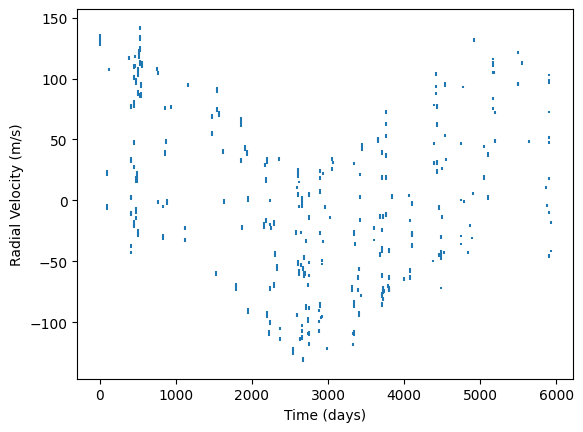

In [80]:
time_full = dataRVC[0]
t0 = time_full.min()
dataRVC[0] = time_full - t0

#create figure and axes to plot to
fig, ax = plt.subplots()

#plot the data with error bars and no connecting lines for better clarity
ax.errorbar(dataRVC[0], dataRVC[1], yerr=dataRVC[2], fmt='none')

#label the axes
ax.set_ylabel("Radial Velocity (m/s)")
ax.set_xlabel("Time (days)")

#save the plot as required
plt.savefig("FinalFig_2_1.pdf", bbox_inches='tight', dpi=300, format='pdf')

In [81]:
#Oscillatory Function
#Describes how star's velocity should vary if it is being tugged by three planets
def multiPlanet_model (t, K1, P1, phi1, K2, P2, phi2, K3, P3, phi3, offset):
    return(
        K1 * np.sin(2 * np.pi * t / P1 + phi1) +
        K2 * np.sin(2 * np.pi * t / P2 + phi2) +
        K3 * np.sin(2 * np.pi * t / P3 + phi3) +
        offset
    )

In [82]:
from scipy.optimize import curve_fit

t = dataRVC[0]
rv = dataRVC[1]
rv_err = dataRVC[2]

# Initial guesses for three-planet model
K1_guess = 70      # m/s (approximate amplitude of ~14.5-day signal)
P1_guess = 14.5    # days (approximate period for first planet)
phi1_guess = 0     # rad

K2_guess = 12      # m/s (approximate amplitude of ~44-day signal)
P2_guess = 44      # days (approximate period for second planet)
phi2_guess = 0     # rad

K3_guess = 120     # m/s (approximate amplitude of ~5200-day signal)
P3_guess = 5200    # days (approximate period for third planet)
phi3_guess = 0     # rad

offset_guess = np.mean(rv)  # systemic velocity

p0 = [
    K1_guess, P1_guess, phi1_guess,
    K2_guess, P2_guess, phi2_guess,
    K3_guess, P3_guess, phi3_guess,
    offset_guess
]

# Fit the three-planet model
popt, pcov = curve_fit(
    multiPlanet_model,
    t,
    rv,
    p0=p0,
    sigma=rv_err,
    absolute_sigma=True,
    maxfev=30000
)

# Print the best-fit parameters and uncertainties
param_names = [
    "K1 (m/s)", "P1 (days)", "phi1",
    "K2 (m/s)", "P2 (days)", "phi2",
    "K3 (m/s)", "P3 (days)", "phi3",
    "offset"
]
for name, val, err in zip(param_names, popt, np.sqrt(np.diag(pcov))):
    print(f"{name}: {val:.3f} +- {err:.3f}")


K1 (m/s): 16.677 +- 0.128
P1 (days): 14.498 +- 0.000
phi1: 0.117 +- 0.019
K2 (m/s): -9.395 +- 0.132
P2 (days): 45.132 +- 0.003
phi2: 6.196 +- 0.033
K3 (m/s): 49.458 +- 0.120
P3 (days): 4836.590 +- 9.936
phi3: 0.852 +- 0.011
offset: -1.316 +- 0.102


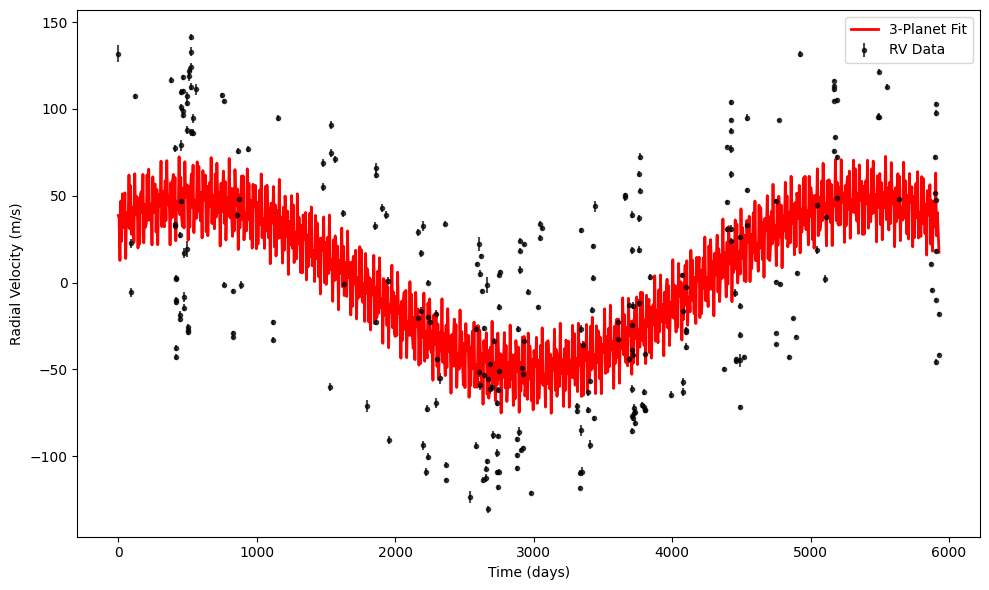

In [83]:
#Plotting the data 
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with error bars (no lines between points)
ax.errorbar(
    dataRVC[0], dataRVC[1], yerr=dataRVC[2], fmt='o', 
    color='k', markersize=3, label='RV Data', alpha=0.7
)

# Plot the fitted model (as a smooth curve)
# Generate fine time points for a smooth model line
t_fine = np.linspace(min(dataRVC[0]), max(dataRVC[0]), 1000)
rv_fit_fine = multiPlanet_model(t_fine, *popt)   # popt = best-fit params from curve_fit

ax.plot(t_fine, rv_fit_fine, 'r-', lw=2, label='3-Planet Fit')

# Label the axes
ax.set_xlabel("Time (days)")
ax.set_ylabel("Radial Velocity (m/s)")

ax.legend()
plt.tight_layout()

# Save as required
plt.savefig("FinalFig_2_2.pdf", bbox_inches='tight', dpi=300, format='pdf')
plt.show()


In [ ]:
#Finding the Residuals 

#Computing the residual 
residuals = dataRVC[1] - multiPlanet_model(dataRVC[0], *popt)

In [ ]:
#Plot residual versus time 
fig, ax = plt.subplots(figsize=(10,4))

#Plotting with error bars 
ax.errorbar(dataRVC[0], residuals, yerr = dataRVC[2], fmt = 'o', color = 'tab:blue', markersize = 3, alpha = 0.7, label= 'Residuals')

#Axis labels 
ax.set_xlabel("Time (days)")
ax.set_ylabel("Residuals (m/s)")
ax.set_title("Residuals of 3-planet fit")

ax.legend()
plt.tight_layout()

#Saving the graph
plt.savefig("Residuals_vs._Time.pdf", bbox_inches = 'tight', dpi = 300, format = 'pdf')
plt.show()

#Histograph of the residuals 
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(residuals, bins = 'auto', color = 'grey', edgecolor = 'black', alpha = 0.8)

ax.set_xlabel("Residuals(m/s)")
ax.set_ylabel("Count")
ax.set_title("Histogram of RV Residuals")

#Saving the residuals graph
plt.savefig("Residuals_Histogram.pdf", bbox_inches = 'tight', dpi = 300, format = 'pdf')
plt.show()

In [ ]:
#Computing the std_deviations and mean quoted error
#Printing the data 
std_resid = np.std(residuals)
mean_sigma = np.mean(dataRVC[2])

print(f"Standard deviation of residuals: {std_resid:.3f} m/s")
print(f"Mean quoted measurment error:    {mean_sigma:.3f} m/s")

if std_resid > mean_sigma:
    print("Residual Scatter is larger than the average measurment error")
else:
    print("Residual scatter is comparable ro or smaller than the measurment error")